<a href="https://colab.research.google.com/github/snehachavhan2004/PRODIGY_ML_3/blob/main/PRODIGY_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/catsAndDogs40/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/catsAndDogs40/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 64 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Rescaling

normalization_layer = Rescaling(1.0 / 255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 10s/step - accuracy: 0.5208 - loss: 4.4195 - val_accuracy: 0.4375 - val_loss: 1.0973
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 9s/step - accuracy: 0.7812 - loss: 3.3823 - val_accuracy: 0.5625 - val_loss: 1.0668
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 30s 10s/step - accuracy: 0.8854 - loss: 1.7623 - val_accuracy: 0.5000 - val_loss: 2.1591
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step - accuracy: 0.9167 - loss: 1.3728 - val_accuracy: 0.5625 - val_loss: 1.1128
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 9s/step - accuracy: 0.9375 - loss: 0.4874 - val_accuracy: 0.5000 - val_loss: 1.8121
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step - accuracy: 0.8750 - loss: 2.1722 - val_accuracy: 0.5000 - val_loss: 2.5128
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.9375 - loss: 0.9432 - val_accuracy: 0.4375 - val_loss: 2.2197
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step - accuracy: 0.9792 - loss: 0.1694 - val_accuracy: 0.3125 - val_loss: 1.8259
Epoch 

In [ ]:
import plotly.express as px
import pandas as pd

history_df = pd.DataFrame(history.history)

fig = px.line(history_df, y=['accuracy', 'val_accuracy'],
              labels={'value': 'Accuracy', 'variable': 'Dataset'},
              title='Model Accuracy Over Epochs')
fig.update_traces(mode='lines+markers')
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Convert the training history to a DataFrame
history_df = pd.DataFrame(history.history)

# Accuracy Plot
accuracy_fig = px.line(history_df, y=['accuracy', 'val_accuracy'],
                        labels={'value': 'Accuracy', 'variable': 'Dataset'},
                        title='Accuracy Over Epochs')
accuracy_fig.update_traces(mode='lines+markers')
accuracy_fig.show()

# Loss Plot
loss_fig = px.line(history_df, y=['loss', 'val_loss'],
                   labels={'value': 'Loss', 'variable': 'Dataset'},
                   title='Loss Over Epochs')
loss_fig.update_traces(mode='lines+markers')
loss_fig.show()

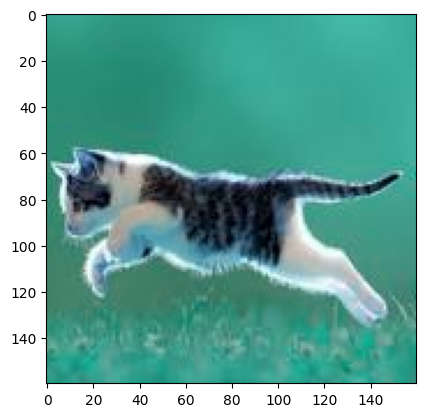

In [ ]:
import cv2
test_img = cv2.imread('/content/drive/MyDrive/catsAndDogs40/test/cat/3.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
result=model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [ ]:
result

array([[-1206.5363]], dtype=float32)

In [ ]:
if result[0]<0:
  print("The image classified is a Cat")
else:
  print("This image classified is a Dog")

The image classified is a Cat
